## **Bank Loan Analysis**

#### **Import Required Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import warnings
import plotly.express as px 

#### **Importing Dataset**

In [2]:
df = pd.read_excel("financial_loan.xlsx")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


#### **Data Info**

In [3]:
print("No. of Rows:", df.shape[0])
print("No. of Columns:", df.shape[1])
df.info()
# we have not used df.dtypes here as in df.info() we already have Dtypes included in it.

No. of Rows: 38576
No. of Columns: 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id             

In [4]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### **KPIs (Key Performance Indicators)**

#### **Total Loan Applications**

In [5]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


#### **MTD (Month-To-Date) Total Loan Applications**

In [6]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
# mtd_data

mtd_loan_application = mtd_data['id'].count()
print(f'MTD Loan Application (for {latest_issue_date.strftime('%B %Y')}) are {mtd_loan_application}')

MTD Loan Application (for December 2021) are 4314


#### **Total Funded Amount**

In [22]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_in_million = total_funded_amount / 1000000
print(f"Total Funded Amount is ₹ {round(total_funded_amount_in_million,1)} M")


Total Funded Amount is ₹ 435.8 M


#### **MTD - Total Funded Amount**

In [ ]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_million = mtd_total_funded_amount / 1000000
# (For {latest_issue_date.strftime("%B %Y")})
print("MTD Total Funded Amount is ₹ {:.2f} M". format(mtd_total_funded_amount_million))


MTD Total Funded Amount is ₹ 53.98 M


#### **Total Amount Received**

In [35]:
total_amount_received = df['total_payment'].sum()
total_amount_received_in_million = total_amount_received / 1000000
print("Total Amount Received is ₹ {:.2f} M". format(total_amount_received_in_million))

Total Amount Received is ₹ 473.07 M


#### **MTD - Total Amount Received**

In [37]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_million = mtd_total_amount_received / 1000000
print("MTD Total Amount Received is ₹ {:.2f} M". format(mtd_total_amount_received_million))

MTD Total Amount Received is ₹ 58.07 M


#### **Average Interest Rate**

In [44]:
average_interest_rate = df['int_rate'].mean()*100
print("Average Interest Rate is {:.2f} % ".format(average_interest_rate))

Average Interest Rate is 12.05 % 


#### **Average Debt-to-income (DTI) Ratio**

In [48]:
average_dti_ratio = df['dti'].mean()*100
print("Average DTI Ratio is {:.2f} %".format(average_dti_ratio))

Average DTI Ratio is 13.33 %


#### **Good Loan Metrics**

In [54]:
good_loan = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_amount_received = good_loan['total_payment'].sum()

good_loan_funded_amount_million = good_loan_funded_amount / 1_000_000
good_loan_amount_received_million = good_loan_amount_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications are", good_loan_applications)
print("Good Loan Funded Amount is ₹ {:.2f} M".format(good_loan_funded_amount_million))
print("Good Loan Amount Received is ₹ {:.2f} M".format(good_loan_amount_received_million))
print("Percentage of Good Loan Applications is {:.2f} %".format(good_loan_percentage))

Good Loan Applications are 33243
Good Loan Funded Amount is ₹ 370.22 M
Good Loan Amount Received is ₹ 435.79 M
Percentage of Good Loan Applications is 86.18 %


#### **Bad Loan Metrics**

In [55]:
bad_loan = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loan['id'].count()
bad_loan_funded_amount = bad_loan['loan_amount'].sum()
bad_loan_amount_received = bad_loan['total_payment'].sum()

bad_loan_funded_amount_million = bad_loan_funded_amount / 1_000_000
bad_loan_amount_received_million = bad_loan_amount_received / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications are", bad_loan_applications)
print("Bad Loan Funded Amount is ₹ {:.2f} M".format(bad_loan_funded_amount_million))
print("Bad Loan Amount Received is ₹ {:.2f} M".format(bad_loan_amount_received_million))
print("Percentage of Bad Loan Applications is {:.2f} %".format(bad_loan_percentage))

Bad Loan Applications are 5333
Bad Loan Funded Amount is ₹ 65.53 M
Bad Loan Amount Received is ₹ 37.28 M
Percentage of Bad Loan Applications is 13.82 %


#### **Data Visualization**

#### **Monthly Trends By Issue Date For Total Funded Amount (Area Chart)**

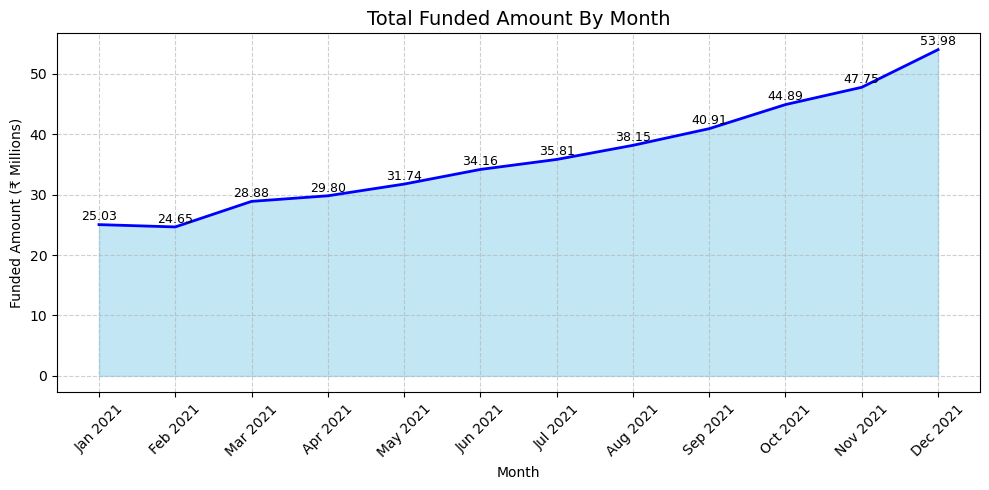

In [65]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime("%b %Y"))
    .groupby("month_name", sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name="loan_amount_millions")
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color="skyblue", alpha = 0.5)
# Here plt.fill_between is used to fill that area under the line in the graph
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color="blue",linewidth = 2)

for i, row in monthly_funded.iterrows() :
    plt.text(i, row['loan_amount_millions'] + 0.2, f'{row['loan_amount_millions']:.2f}',
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
# Here That +0.2 is written to keep that much space between the line and the text

plt.title("Total Funded Amount By Month", fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded) ), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Monthly Trends By Issue Date For Total Amount Received (Area Chart)**

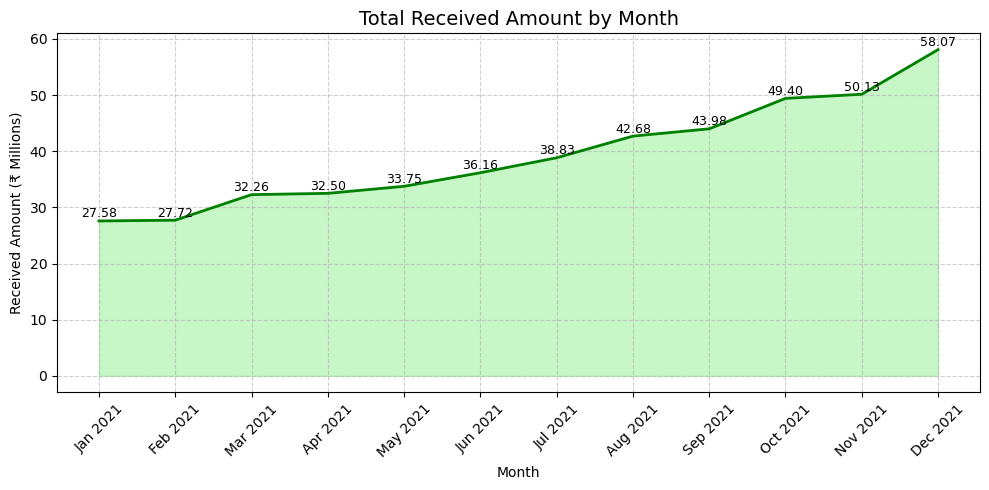

In [80]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received[ 'month_name'], monthly_received['received_amount_millions'],
color='lightgreen', alpha=0.5)
plt.plot(monthly_received[ 'month_name' ], monthly_received[ 'received_amount_millions'],
color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Monthly Trends By Issue Date For Total Loan Applications (Area Chart)**

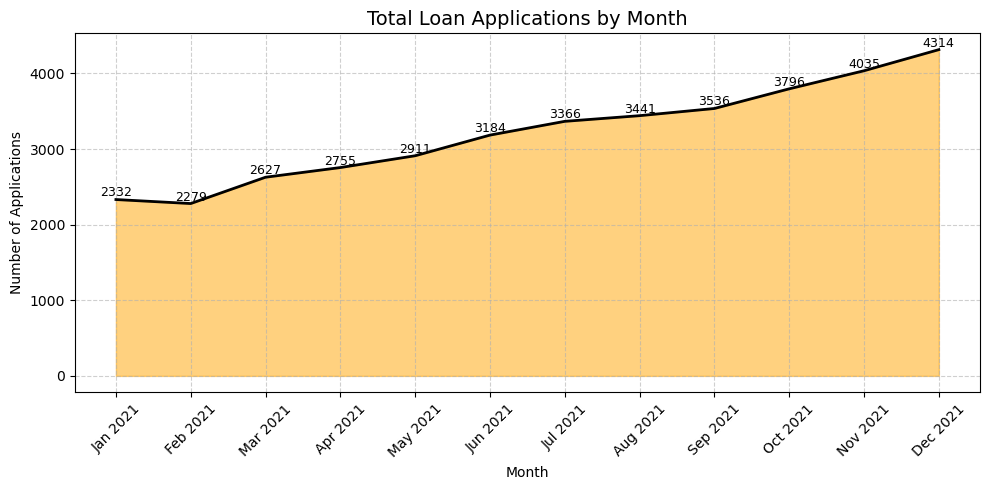

In [86]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
         color='black', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Regional Analysis By State For Total Funded Amount**

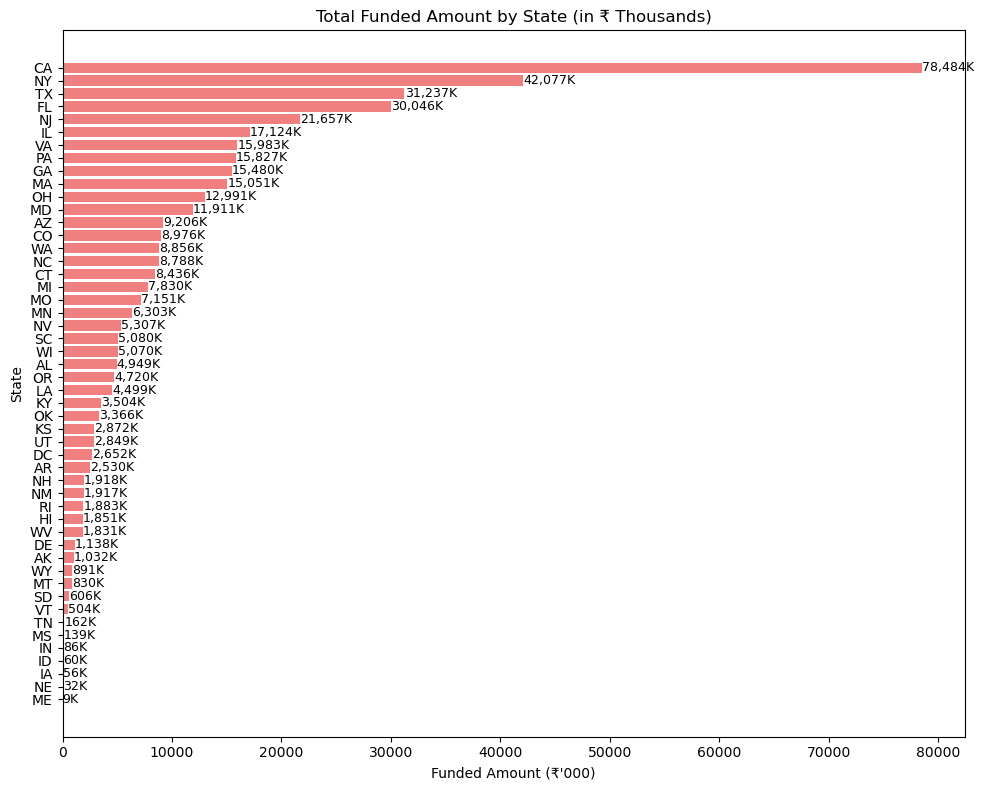

In [ ]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
    f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹\'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### **Loan Term Analysis For Total Funded Amount**

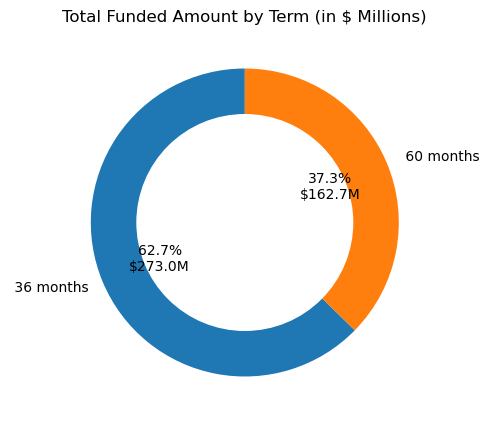

In [90]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(term_funding_millions, labels=term_funding_millions.index, 
        autopct=lambda p: f"{p :.1f}%\n${p*sum(term_funding_millions)/100 :.1f}M",
        startangle=90,
        wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
# plt.gca is used to add that circle in the middle of the Chart to convert Pie chart to Donut Chart
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

#### **Employee Length Analysis By Total Funded Amount**

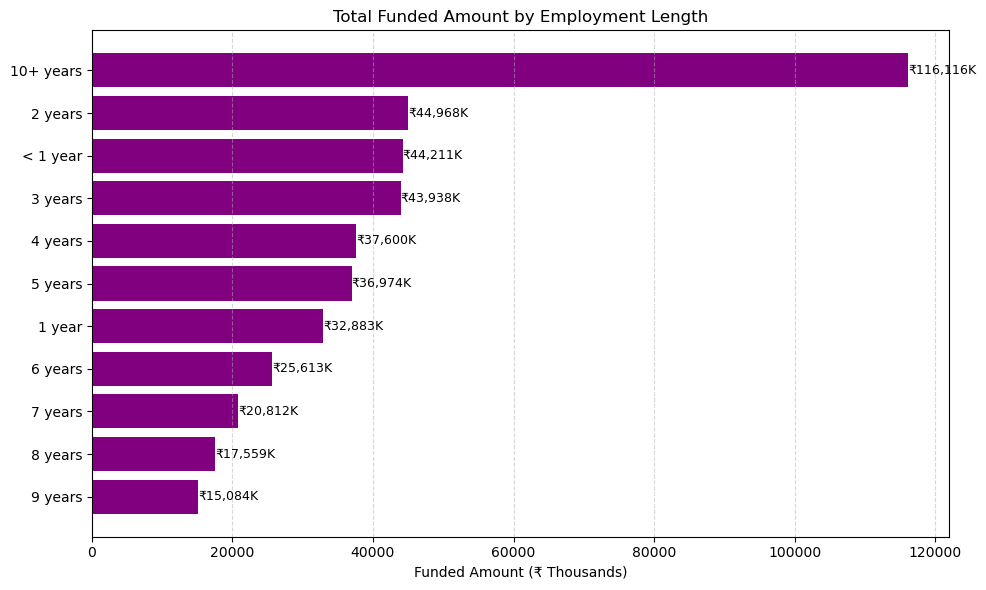

In [93]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding. index, emp_funding, color='purple' )

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() /2,
    f"₹{width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Loan Purpose Breakdown By Total Funded Amount**

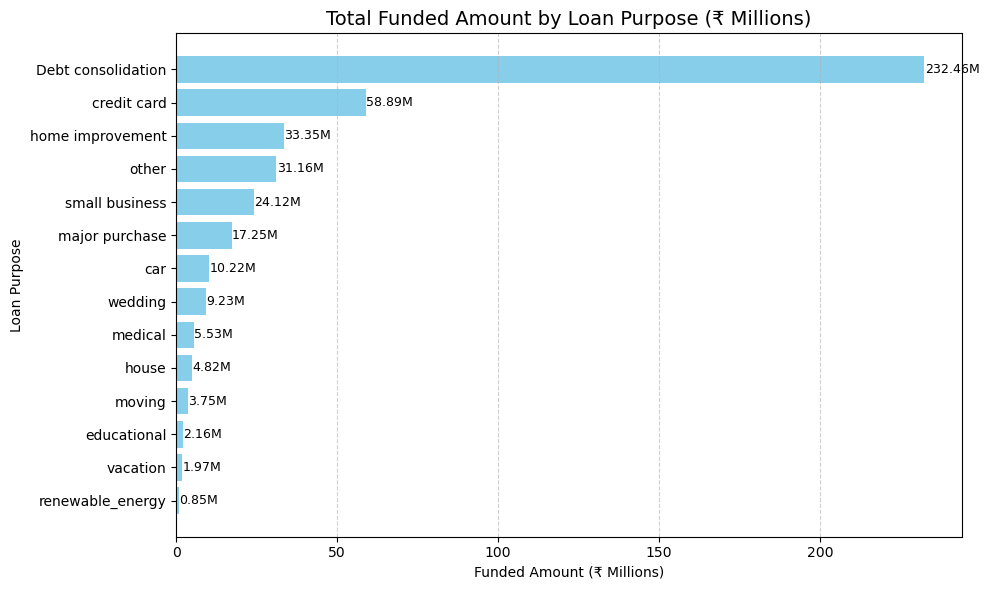

In [95]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/ 1000000)

plt.figure(figsize=(10, 6))
bars = plt. barh(purpose_funding_millions. index, purpose_funding_millions. values, color='skyblue' )

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
    f'{width :.2f}M', va='center', fontsize=9)

plt. title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Funded Amount (₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Home Ownership Analysis By Total Funded Amount**

In [96]:
home_funding = df.groupby('home_ownership' ) ['loan_amount' ].sum() . reset_index()
home_funding['loan_amount_millions' ] = home_funding['loan_amount' ] / 1_000_000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()

#### **There are other two metrics that are Total Loan Amount Received and Total Applications for which these above graphs could be plotted**